### Importación de Librerías

In [15]:
#Importamos librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importación de Datos (csv)

In [16]:
#Leemos el csv
df = pd.read_csv('youtoxic_english_1000.csv')

In [17]:
df.head(10)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
5,Ugg9a6FtoXdxmXgCoAEC,04kJtp6pVXI,here people his facebook is https://www.facebo...,True,False,False,False,False,True,False,False,False,False,True,False
6,Ugga9KzkNDGvlXgCoAEC,04kJtp6pVXI,"Check out this you tube post. ""Black man goes ...",True,False,False,False,False,True,True,False,False,False,False,False
7,UggBlIXoph7p-3gCoAEC,04kJtp6pVXI,I would LOVE to see this pussy go to Staten Is...,True,True,False,False,True,True,True,False,False,False,False,False
8,UggD1aYSn7KOR3gCoAEC,04kJtp6pVXI,I agree with the protestor.,False,False,False,False,False,False,False,False,False,False,False,False
9,UggGm8a1fu8brngCoAEC,04kJtp6pVXI,mike browns father was made to say that boooshit,True,True,False,False,True,False,False,False,False,False,False,False


In [18]:
df.shape

(1000, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


### Exploración Básica de las Labels (variables de respuesta)

In [20]:
#Extraemos las columnas a modo de lista
columns = df.columns.tolist()

#Seleccionamos únicamente las etiquetas (clases respuesta)
labels = columns[3:]

#Creamos una lista vacía para guardar las labels que están demasiado desbalanceadas
drop_cols = []

#Mostramos si las etiquetas (clases respuesta) están balanceadas
for label in labels:
    # sns.histplot(df[label])
    # plt.title(label)
    # plt.show()
    true_quant = df[label][(df[label]==True)].count()
    false_quant = df[label][(df[label]==False)].count()
    total_sum = true_quant + false_quant
    proportion_minority = round((true_quant/total_sum)*100, 2)
    if proportion_minority < 10:
        drop_cols.append(label)
    print(label)
    print(f'Cantidad Verdaderos: {true_quant}\nCantidad Falsos: {false_quant}\nTotal Datos: {total_sum}\nProporción Minoritaria: {proportion_minority}%')
    print('-'*50)

IsToxic
Cantidad Verdaderos: 462
Cantidad Falsos: 538
Total Datos: 1000
Proporción Minoritaria: 46.2%
--------------------------------------------------
IsAbusive
Cantidad Verdaderos: 353
Cantidad Falsos: 647
Total Datos: 1000
Proporción Minoritaria: 35.3%
--------------------------------------------------
IsThreat
Cantidad Verdaderos: 21
Cantidad Falsos: 979
Total Datos: 1000
Proporción Minoritaria: 2.1%
--------------------------------------------------
IsProvocative
Cantidad Verdaderos: 161
Cantidad Falsos: 839
Total Datos: 1000
Proporción Minoritaria: 16.1%
--------------------------------------------------
IsObscene
Cantidad Verdaderos: 100
Cantidad Falsos: 900
Total Datos: 1000
Proporción Minoritaria: 10.0%
--------------------------------------------------
IsHatespeech
Cantidad Verdaderos: 138
Cantidad Falsos: 862
Total Datos: 1000
Proporción Minoritaria: 13.8%
--------------------------------------------------
IsRacist
Cantidad Verdaderos: 125
Cantidad Falsos: 875
Total Datos: 

### Selección de Etiquetas

- Eliminamos todas las columnas (labels) y dejamos únicamente la primera: IsToxic

- También eliminamos los ID del video y del comentario pues esto es irrelevante para el entrenamiento.

In [21]:
df_short = df.iloc[:, 2:4]

In [22]:
#Dataframe original
df.shape

(1000, 15)

In [23]:
#Dataframe corto después de haber eliminado columnas que en principio no son relevantes
df_short.shape

(1000, 2)

In [24]:
df_short.head()

,Text,IsToxic
0,If only people would just take a step back and...,False
1,Law enforcement is not trained to shoot to app...,True
2,\nDont you reckon them 'black lives matter' ba...,True
3,There are a very large number of people who do...,False
4,"The Arab dude is absolutely right, he should h...",False


### Separación X-y

In [25]:
#Por simplicidad reemplazamos True y False por 1 y 0
df_short = df_short.replace({True: 1, False: 0})

In [26]:
X = df_short['Text']

y = df_short['IsToxic']
print(y.head())

0    0
1    1
2    1
3    0
4    0
Name: IsToxic, dtype: int64


### Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [28]:
print(f'X_train: {X_train.shape} || y_train: {y_train.shape} || X_test: {X_test.shape} || y_test: {y_test.shape}')

X_train: (850,) || y_train: (850,) || X_test: (150,) || y_test: (150,)


In [29]:
#Reservamos esta copia para usar en el Pipeline final
X_train_pipe = X_train.copy()

X_train_pipe

643                The fuck are thes cops being a pussy?
158    We need to get back to basics. When these sava...
977    11:21 LMAO "I don't agree with the rioting and...
429    Wow  common sense in 20014 How refreshing .......
941    THE ONLY JUSTICE WE WILL GET IS IN THE STREET....
                             ...                        
106    I think that this indecent is unessacerry for ...
270    you are  clearly a racists shrill a canadian v...
860    and what do the people see here,i can't even u...
435    This is so far off base that you can't even ca...
102    "I don't want my sons death to be in vain." "L...
Name: Text, Length: 850, dtype: object

### Creación de Test para verificación Final

In [30]:
def create_test_set(X_test, y_test):
    '''
    This function creates the test dataset to be used at the end
    for model validation. It concatenates the X_test and Y_test
    obtained before after stratification and splitting.
    '''
    data_test = pd.concat([X_test, y_test], axis=1)
    data_test.to_csv('data_for_testing.csv')

    print('')
    print('File data_for_testing.csv saved correctly')

In [31]:
create_test_set(X_test, y_test)


File data_for_testing.csv saved correctly


### Preprocesado

In [32]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.0 MB/s eta 0:00:00


In [33]:
import re
import contractions
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#### Expand Contractions

In [34]:
X_train

643                The fuck are thes cops being a pussy?
158    We need to get back to basics. When these sava...
977    11:21 LMAO "I don't agree with the rioting and...
429    Wow  common sense in 20014 How refreshing .......
941    THE ONLY JUSTICE WE WILL GET IS IN THE STREET....
                             ...                        
106    I think that this indecent is unessacerry for ...
270    you are  clearly a racists shrill a canadian v...
860    and what do the people see here,i can't even u...
435    This is so far off base that you can't even ca...
102    "I don't want my sons death to be in vain." "L...
Name: Text, Length: 850, dtype: object

In [35]:
#Aplicamos la librería contractions para reemplazar las contracciones
X_train = X_train.apply(lambda x: contractions.fix(x))

In [36]:
X_train

643                The fuck are thes cops being a pussy?
158    We need to get back to basics. When these sava...
977    11:21 LMAO "I do not agree with the rioting an...
429    Wow  common sense in 20014 How refreshing .......
941    THE ONLY JUSTICE WE WILL GET IS IN THE STREET....
                             ...                        
106    I think that this indecent is unessacerry for ...
270    you are  clearly a racists shrill a canadian v...
860    and what do the people see here,i cannot even ...
435    This is so far off base that you cannot even c...
102    "I do not want my sons death to be in vain." "...
Name: Text, Length: 850, dtype: object

#### Pasar a minúsculas, eliminar caracteres especiales y números

In [37]:
#Pasar a minúsculas, eliminar caracteres especiales
def preprocess_text(text):

    #Convierte todo el texto en a minúsculas
    text = text.lower()

    #Reemplaza cualquier carácter no alfanumérico en 'text' con un espacio en blanco.
    text = re.sub(r'\W', ' ', text)

    #Elimina espacios en blanco adicionales
    text = re.sub(r'\s+', ' ', text)

    #Elimina los espacios en blanco al principio y al final de la cadena 'text'.
    text = text.strip()

    #Elimina números
    text = re.sub(r'\d+', '', text)

    #Divide la cadena 'text' en palabras individuales, y luego une estas palabras nuevamente
    # en una cadena con un solo espacio entre cada palabra.
    text = ' '.join(text.split())  # Elimina espacios en blanco adicionales

    return text

In [38]:
# Aplicar la función a la columna 'Text'
X_train = X_train.apply(preprocess_text)

X_train

643                 the fuck are thes cops being a pussy
158    we need to get back to basics when these savag...
977    lmao i do not agree with the rioting and the v...
429    wow common sense in how refreshing great job s...
941    the only justice we will get is in the street ...
                             ...                        
106    i think that this indecent is unessacerry for ...
270    you are clearly a racists shrill a canadian ve...
860    and what do the people see here i cannot even ...
435    this is so far off base that you cannot even c...
102    i do not want my sons death to be in vain let ...
Name: Text, Length: 850, dtype: object

In [39]:
print(X_train.shape, type(X_train))

(850,) <class 'pandas.core.series.Series'>


### Embeddings usando la API de OpenAI

In [ ]:
!pip install openai
!pip install tiktoken

In [41]:
import openai
from getpass import getpass
import os

In [42]:
OPENAI_API_KEY = getpass('Enter the secret value: ')
openai.api_key = OPENAI_API_KEY

Enter the secret value: ··········


In [43]:
import tiktoken

def num_tokens_from_string(text, encoding_name):
  '''
  Esta función devuelve el número de tokens del texto.
  Sirve para calcular el precio a pagar por el llamado a la API.
  '''
  encoding = tiktoken.get_encoding(encoding_name)
  num_tokens = len(encoding.encode(text))
  return num_tokens

In [44]:
type(X_train)

pandas.core.series.Series

In [45]:
X_train = X_train.to_frame()

In [46]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [47]:
X_train['total_tokens'] = X_train['Text'].apply(lambda x : num_tokens_from_string(x, 'cl100k_base'))

In [48]:
X_train

,Text,total_tokens
643,the fuck are thes cops being a pussy,9
158,we need to get back to basics when these savag...,24
977,lmao i do not agree with the rioting and the v...,20
429,wow common sense in how refreshing great job s...,15
941,the only justice we will get is in the street ...,21
...,...,...
106,i think that this indecent is unessacerry for ...,34
270,you are clearly a racists shrill a canadian ve...,30
860,and what do the people see here i cannot even ...,42
435,this is so far off base that you cannot even c...,14


In [49]:
sum(X_train['total_tokens'])

30690

Esto es menos de un dólar :)

In [50]:
from openai import OpenAI

client = OpenAI(api_key=openai.api_key)

def get_embedding(text, model='text-embedding-ada-002'):
  text = text.replace('\n', '')
  response = client.embeddings.create(input=[text], model=model)
  return response.data[0].embedding

In [51]:
X_train['ada_embedding'] = X_train['Text'].apply(lambda x: get_embedding(x))

In [52]:
X_train

,Text,total_tokens,ada_embedding
643,the fuck are thes cops being a pussy,9,"[-0.010058139450848103, 0.007985435426235199, ..."
158,we need to get back to basics when these savag...,24,"[-0.005837251897901297, 0.007304828148335218, ..."
977,lmao i do not agree with the rioting and the v...,20,"[-0.01921163871884346, -0.013394568115472794, ..."
429,wow common sense in how refreshing great job s...,15,"[0.007790876552462578, 0.0018121510511264205, ..."
941,the only justice we will get is in the street ...,21,"[-0.00731348292902112, -0.00031206553103402257..."
...,...,...,...
106,i think that this indecent is unessacerry for ...,34,"[-0.006111025810241699, 0.014714973047375679, ..."
270,you are clearly a racists shrill a canadian ve...,30,"[-0.019796160981059074, -0.04052818566560745, ..."
860,and what do the people see here i cannot even ...,42,"[0.008504550904035568, -0.026745347306132317, ..."
435,this is so far off base that you cannot even c...,14,"[-0.015237701125442982, -0.00920309778302908, ..."


In [53]:
X_train_open_ai = pd.DataFrame(list(X_train['ada_embedding']))
print(X_train_open_ai.shape)
print(X_train_open_ai)

(850, 1536)
         0         1         2         3         4         5         6     \
0   -0.010058  0.007985 -0.000817 -0.032046 -0.013196 -0.003652  0.014152   
1   -0.005837  0.007305 -0.032102 -0.014742 -0.016738  0.018034 -0.007986   
2   -0.019212 -0.013395 -0.010295 -0.005227 -0.034392 -0.010467 -0.003162   
3    0.007791  0.001812 -0.002856 -0.041707 -0.010859  0.027457 -0.015019   
4   -0.007313 -0.000312  0.009696 -0.020551 -0.017128  0.010987 -0.008038   
..        ...       ...       ...       ...       ...       ...       ...   
845 -0.006111  0.014715 -0.006660 -0.027058 -0.038351  0.012781  0.013657   
846 -0.019796 -0.040528 -0.004432 -0.014220  0.015572  0.012855 -0.021226   
847  0.008505 -0.026745  0.016670 -0.044315  0.000143  0.008987  0.008146   
848 -0.015238 -0.009203 -0.013818 -0.018958 -0.015816 -0.011353 -0.029424   
849 -0.020101 -0.007535 -0.035916 -0.006904 -0.013536  0.023492 -0.023451   

         7         8         9     ...      1526      1527     

### Embeddings usando Sentence Transformers

In [ ]:
!pip install -U sentence-transformers

In [55]:
from sentence_transformers import SentenceTransformer, util

In [56]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [57]:
X_train['Text']

643                 the fuck are thes cops being a pussy
158    we need to get back to basics when these savag...
977    lmao i do not agree with the rioting and the v...
429    wow common sense in how refreshing great job s...
941    the only justice we will get is in the street ...
                             ...                        
106    i think that this indecent is unessacerry for ...
270    you are clearly a racists shrill a canadian ve...
860    and what do the people see here i cannot even ...
435    this is so far off base that you cannot even c...
102    i do not want my sons death to be in vain let ...
Name: Text, Length: 850, dtype: object

In [58]:
X_train_embeddings = model.encode(X_train['Text'].tolist(), batch_size=64, show_progress_bar=True)

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

In [59]:
X_train_embeddings

array([[-0.01612668,  0.02983521,  0.03774887, ...,  0.03893904,
         0.1358921 ,  0.04613366],
       [ 0.07289755, -0.00752613,  0.01733793, ..., -0.01205324,
        -0.04980316,  0.02051115],
       [ 0.06268978,  0.00141552,  0.0617569 , ...,  0.0205505 ,
        -0.01057854,  0.04244879],
       ...,
       [ 0.06631441,  0.0279671 , -0.02384407, ..., -0.02968057,
        -0.00198941,  0.00910457],
       [ 0.04850516, -0.02739059, -0.09126785, ..., -0.06823489,
         0.07192653, -0.0013103 ],
       [-0.00469382,  0.04709622, -0.02129808, ...,  0.01122832,
         0.04314398, -0.0544897 ]], dtype=float32)

In [60]:
X_train_embeddings = pd.DataFrame(list(X_train_embeddings))
print(X_train_embeddings.shape)
print(X_train_embeddings)

(850, 384)
          0         1         2         3         4         5         6    \
0   -0.016127  0.029835  0.037749  0.004228  0.000096  0.008376  0.031255   
1    0.072898 -0.007526  0.017338  0.037193  0.059779  0.032494  0.024535   
2    0.062690  0.001416  0.061757 -0.054470  0.119375  0.059550  0.093006   
3   -0.007651 -0.025784  0.049296 -0.005121  0.055163  0.002987  0.069272   
4   -0.007894 -0.012658 -0.049922 -0.101193  0.041559  0.035503  0.095471   
..        ...       ...       ...       ...       ...       ...       ...   
845 -0.033236  0.074417  0.019801 -0.021160  0.075267 -0.000863  0.101788   
846  0.017317  0.046872 -0.013673  0.036909  0.015687  0.022113 -0.004593   
847  0.066314  0.027967 -0.023844 -0.011904 -0.045894  0.068809  0.039186   
848  0.048505 -0.027391 -0.091268  0.012941  0.092236  0.030639 -0.010624   
849 -0.004694  0.047096 -0.021298 -0.077554  0.090589  0.008573  0.058237   

          7         8         9    ...       374       375      

### Modelos a Testar

In [61]:
!pip install xgboost

In [62]:
!pip install lightgbm

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import  XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

models = {'RandomForest': RandomForestClassifier(random_state= 42),
'LogisticRegression': LogisticRegression(random_state=42),
'AdaBoost': AdaBoostClassifier(random_state=42),
'GradientBoost': GradientBoostingClassifier(random_state=42),
'LGBM': LGBMClassifier(random_state=42),
'XGB': XGBClassifier(random_state=42),
'KNN': KNeighborsClassifier(n_neighbors=5)}

### Validación Cruzada

In [64]:
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def model_evaluation(X_vectorized, y, models):

    '''
    This function evaluates the performance of the models using cross validation.
    It returns the results in a DataFrame.
    '''
    # Converting X and y to a numpy array for LGBM to work well
    X_vectorized = X_vectorized.astype(np.float32)
    y = y.astype(np.float32)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

    results = []

    for model_name, model in models.items():
        # 'cross_validate' internally fits the model during each fold.
        scores = cross_validate(model, X_vectorized, y, scoring=scoring, cv=kf, return_train_score=True,error_score='raise')

        mean_accuracy = round(scores['test_accuracy'].mean(), 3)
        mean_precision = round(scores['test_precision'].mean(), 3)
        mean_recall = round(scores['test_recall'].mean(), 3)
        mean_f1 = round(scores['test_f1'].mean(), 3)
        overfitting_recall = round((scores['train_recall'].mean() - mean_recall), 3)

        # Append the results
        model_metrics = {'Model': str(model), 'Accuracy': mean_accuracy, 'Precision': mean_precision,
        'Recall': mean_recall, 'F1': mean_f1, 'Overfitting Recall': overfitting_recall}
        results.append(model_metrics)

    # Create a DataFrame from the results list
    results_df = pd.DataFrame(results)

    return results_df

### Resultados con Embeddings (Sentence Transformers): CV

In [ ]:
results_cv = model_evaluation(X_train_embeddings, y_train, models)

In [66]:
results_cv

,Model,Accuracy,Precision,Recall,F1,Overfitting Recall
0,RandomForestClassifier(random_state=42),0.688,0.725,0.515,0.593,0.485
1,LogisticRegression(random_state=42),0.748,0.758,0.659,0.700,0.118
2,AdaBoostClassifier(random_state=42),0.646,0.615,0.598,0.602,0.314
3,GradientBoostingClassifier(random_state=42),0.684,0.668,0.607,0.630,0.393
4,LGBMClassifier(random_state=42),0.711,0.702,0.639,0.664,0.361
5,"XGBClassifier(base_score=None, booster=None, c...",0.700,0.690,0.619,0.649,0.381
6,KNeighborsClassifier(),0.676,0.628,0.691,0.656,0.103


### Resultados con Embeddings (Open AI): CV

In [ ]:
results_cv = model_evaluation(X_train_open_ai, y_train, models)

In [68]:
results_cv

,Model,Accuracy,Precision,Recall,F1,Overfitting Recall
0,RandomForestClassifier(random_state=42),0.734,0.770,0.595,0.667,0.405
1,LogisticRegression(random_state=42),0.775,0.825,0.642,0.719,0.084
2,AdaBoostClassifier(random_state=42),0.734,0.708,0.701,0.703,0.262
3,GradientBoostingClassifier(random_state=42),0.764,0.759,0.695,0.724,0.305
4,LGBMClassifier(random_state=42),0.761,0.758,0.697,0.724,0.303
5,"XGBClassifier(base_score=None, booster=None, c...",0.754,0.742,0.700,0.719,0.300
6,KNeighborsClassifier(),0.707,0.655,0.738,0.693,0.101


### Randomized Search + CV en una sola Función

In [69]:
#Parámetros a testar
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'LogisticRegression': {
        'penalty': ['none', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'GradientBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    },
    'LGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    },
    'XGB': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
    }

In [70]:
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def model_evaluation_tuning(X_vectorized, y, models):

    '''
    This function evaluates the performance of the models using cross validation.
    It returns the results in a DataFrame.
    '''
    #Converting X and y to a numpy array for LGBM to work well
    X_vectorized = X_vectorized.astype(np.float32)
    y = y.astype(np.float32)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

    results = []

    for model_name, model in models.items():
        #Randomized Search includes cross validation
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grids[model_name], cv=kf,
        scoring=scoring, error_score='raise', refit='recall', return_train_score=True, n_iter=10, random_state=42)
        random_search.fit(X_vectorized, y)

        #Parameter setting that gave the best results on the hold out data.
        best_params = random_search.best_params_

        #Mean cross-validated score of the best_estimator.
        best_score = random_search.best_score_

        #Estimator that was chosen by the search, i.e. estimator
        #which gave highest score (or smallest loss if specified) on the left out data.
        best_model = random_search.best_estimator_

        #For multi-metric evaluation, the scores for all the scorers are available
        #in the cv_results_ dict at the keys ending with that scorer’s name ('_<scorer_name>')
        cv_results = random_search.cv_results_

        #The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.
        best_index = random_search.best_index_

        mean_accuracy = np.round(np.mean(cv_results['mean_test_accuracy'][best_index]), 3)
        mean_precision = np.round(np.mean(cv_results['mean_test_precision'][best_index]), 3)
        mean_recall = np.round(np.mean(cv_results['mean_test_recall'][best_index]), 3)
        mean_f1 = np.round(np.mean(cv_results['mean_test_f1'][best_index]), 3)
        overfitting_recall = np.round(np.mean(cv_results['mean_train_recall'][best_index] - mean_recall), 3)

        #Append the results
        model_metrics = {'Model': model_name, 'Accuracy': mean_accuracy, 'Precision': mean_precision,
        'Recall': mean_recall, 'F1': mean_f1, 'Overfitting_Recall': overfitting_recall, 'Best_Params': best_params,
        'Best_Score_Recall': best_score,}
        results.append(model_metrics)

    #Create a DataFrame from the results list
    results_df = pd.DataFrame(results)

    return results_df

### Resultados con Embeddings (Sentence Transformers): Tuning + CV

In [ ]:
results_tuning = model_evaluation_tuning(X_train_embeddings, y_train, models)

In [72]:
results_tuning

,Model,Accuracy,Precision,Recall,F1,Overfitting_Recall,Best_Params,Best_Score_Recall
0,RandomForest,0.707,0.723,0.574,0.636,0.426,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.574236
1,LogisticRegression,0.715,0.699,0.661,0.675,0.202,"{'penalty': 'l2', 'C': 10}",0.661268
2,AdaBoost,0.680,0.668,0.604,0.629,0.396,"{'n_estimators': 200, 'learning_rate': 1.0}",0.603899
3,GradientBoost,0.707,0.701,0.622,0.654,0.378,"{'n_estimators': 200, 'max_depth': 3, 'learnin...",0.622131
4,LGBM,0.704,0.693,0.632,0.655,0.368,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.632133
5,XGB,0.693,0.682,0.611,0.640,0.389,"{'n_estimators': 200, 'max_depth': 3, 'learnin...",0.611262
6,KNN,0.680,0.632,0.699,0.662,0.301,"{'weights': 'distance', 'p': 1, 'n_neighbors': 5}",0.698995


### Resultados con Embeddings (OpenAI): Tuning +CV

In [ ]:
results_tuning = model_evaluation_tuning(X_train_open_ai, y_train, models)

In [74]:
results_tuning

,Model,Accuracy,Precision,Recall,F1,Overfitting_Recall,Best_Params,Best_Score_Recall
0,RandomForest,0.760,0.778,0.654,0.709,0.346,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.653558
1,LogisticRegression,0.778,0.769,0.730,0.747,0.267,"{'penalty': 'l2', 'C': 100}",0.729561
2,AdaBoost,0.746,0.722,0.711,0.715,0.289,"{'n_estimators': 200, 'learning_rate': 1.0}",0.710800
3,GradientBoost,0.759,0.762,0.678,0.716,0.322,"{'n_estimators': 200, 'max_depth': 3, 'learnin...",0.677858
4,LGBM,0.773,0.760,0.726,0.741,0.274,"{'n_estimators': 50, 'max_depth': 5, 'learning...",0.725813
5,XGB,0.760,0.752,0.703,0.724,0.297,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.703308
6,KNN,0.712,0.661,0.741,0.697,0.078,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 7}",0.740639


### Mejor Modelo (mejor relación entre las métricas y más bajo overfitting)

- Regresión Logística

In [76]:
best_params = results_tuning.loc[1, 'Best_Params']

print(best_params)

{'penalty': 'l2', 'C': 100}


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7dc38f2e-d35e-4396-9da7-b224a3d4724e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

### Redes Neuronales con Keras (incluyendo CV)

In [86]:
def plot_learning_curves(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import RMSprop, Adam

#Seeds for reproducibility
np.random.seed(16)
tf.random.set_seed(16)

def cross_val_nn(X, y, input_shape):
  #Define 5-fold cross validation
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  metrics = [tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
  cvscores_acc = []
  cvscores_pre = []
  cvscores_rec = []

  for fold_idx, (train, test) in enumerate(kfold.split(X, y)):
    print(f"Fold {fold_idx + 1} - Longitud de índices de entrenamiento: {len(train)} / Longitud de índices de prueba: {len(test)}")

    #Create model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    #Compile model
    optimizer = RMSprop(learning_rate=0.00093)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

    #Fit the model
    history = model.fit(X[train], y[train], epochs=8, batch_size=8, validation_data=(X[test], y[test]))

    #Evaluate the model
    scores = model.evaluate(X[test], y[test], verbose=0)

    print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
    print("%s: %.2f%%" % (model.metrics_names[2], scores[2] * 100))
    print("%s: %.2f%%" % (model.metrics_names[3], scores[3] * 100))

    # Plot learning curves
    plot_learning_curves(history)

    cvscores_acc.append(scores[1] * 100)
    cvscores_pre.append(scores[2] * 100)
    cvscores_rec.append(scores[3] * 100)

  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_acc), np.std(cvscores_acc)))
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_pre), np.std(cvscores_pre)))
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_rec), np.std(cvscores_rec)))

  #Save the model
  model.save('neural_network.h5')




- X_train vectorizada con Embeddings (Sentence Transformers)



In [156]:
X_train_embeddings = X_train_embeddings.to_numpy().astype('float32')
y_train = y_train.values.astype('float32')

AttributeError: ignored

In [88]:
print(type(X_train_embeddings))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Fold 1 - Longitud de índices de entrenamiento: 680 / Longitud de índices de prueba: 170
Epoch 1/8
85/85 [==============================] - 2s 15ms/step - loss: 0.6824 - binary_accuracy: 0.5647 - precision_12: 0.5378 - recall_12: 0.2098 - val_loss: 0.6572 - val_binary_accuracy: 0.6000 - val_precision_12: 1.0000 - val_recall_12: 0.1169
Epoch 2/8
85/85 [==============================] - 1s 11ms/step - loss: 0.6252 - binary_accuracy: 0.6676 - precision_12: 0.7283 - recall_12: 0.4131 - val_loss: 0.5822 - val_binary_accuracy: 0.6941 - val_precision_12: 0.8571 - val_recall_12: 0.3896
Epoch 3/8
85/85 [==============================] - 1s 11ms/step - loss: 0.5402 - binary_accuracy: 0.7441 - precision_12: 0.7510 - recall_12: 0.6426 - val_loss: 0.5085 - val_binary_accuracy: 0.7824 - val_precision_12: 0.8448 - val_recall_12: 0.6364
Epoch 4/8
85/85 [==============================] - 1s 16ms/step - loss: 0.4718 - binary_accuracy: 0.7750 - precision_12: 0.7550 - recall_12: 0.7377 - val_loss: 0.4727 -

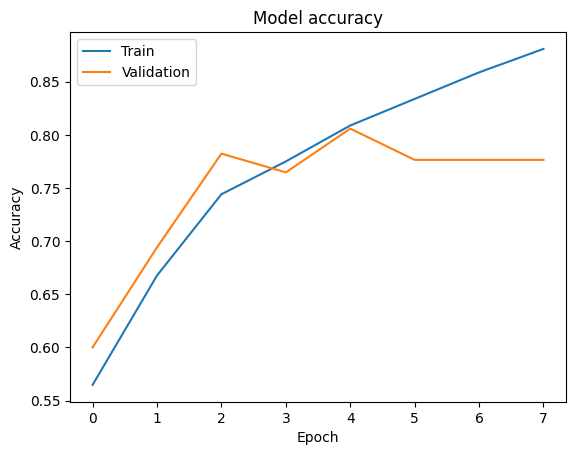

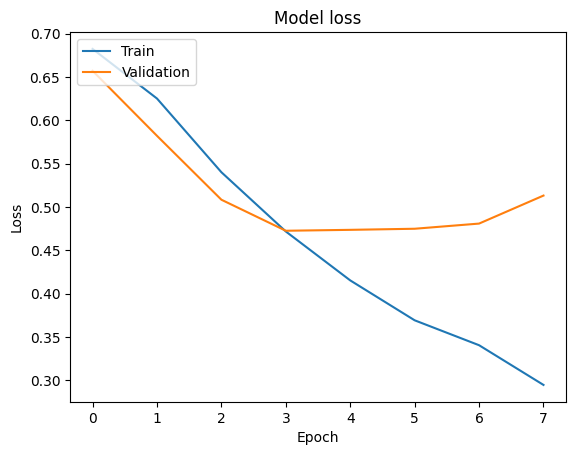

Fold 2 - Longitud de índices de entrenamiento: 680 / Longitud de índices de prueba: 170
Epoch 1/8
85/85 [==============================] - 1s 6ms/step - loss: 0.6862 - binary_accuracy: 0.5918 - precision_12: 0.5822 - recall_12: 0.3246 - val_loss: 0.6692 - val_binary_accuracy: 0.6529 - val_precision_12: 0.8000 - val_recall_12: 0.3117
Epoch 2/8
85/85 [==============================] - 0s 3ms/step - loss: 0.6423 - binary_accuracy: 0.6971 - precision_12: 0.7592 - recall_12: 0.4754 - val_loss: 0.5908 - val_binary_accuracy: 0.7824 - val_precision_12: 0.7703 - val_recall_12: 0.7403
Epoch 3/8
85/85 [==============================] - 0s 3ms/step - loss: 0.5528 - binary_accuracy: 0.7588 - precision_12: 0.7640 - recall_12: 0.6689 - val_loss: 0.5027 - val_binary_accuracy: 0.7529 - val_precision_12: 0.7059 - val_recall_12: 0.7792
Epoch 4/8
85/85 [==============================] - 0s 3ms/step - loss: 0.4868 - binary_accuracy: 0.7853 - precision_12: 0.7508 - recall_12: 0.7803 - val_loss: 0.4594 - val

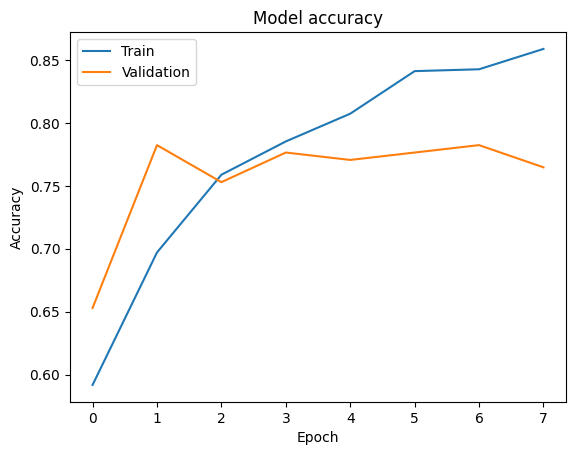

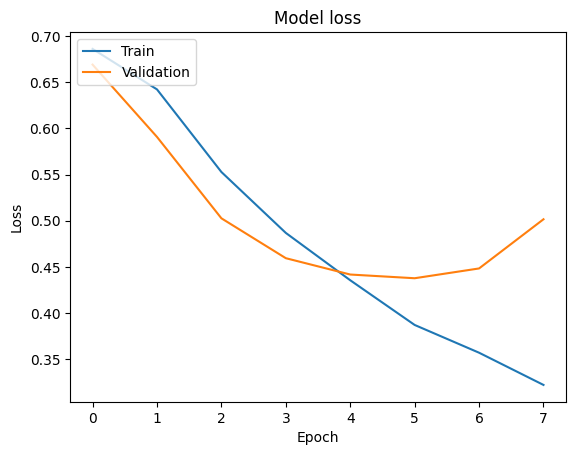

Fold 3 - Longitud de índices de entrenamiento: 680 / Longitud de índices de prueba: 170
Epoch 1/8
85/85 [==============================] - 5s 23ms/step - loss: 0.6757 - binary_accuracy: 0.6247 - precision_12: 0.8019 - recall_12: 0.2219 - val_loss: 0.6561 - val_binary_accuracy: 0.6294 - val_precision_12: 0.6140 - val_recall_12: 0.4605
Epoch 2/8
85/85 [==============================] - 1s 12ms/step - loss: 0.6021 - binary_accuracy: 0.7000 - precision_12: 0.7040 - recall_12: 0.5752 - val_loss: 0.5914 - val_binary_accuracy: 0.6941 - val_precision_12: 0.6579 - val_recall_12: 0.6579
Epoch 3/8
85/85 [==============================] - 1s 10ms/step - loss: 0.5175 - binary_accuracy: 0.7647 - precision_12: 0.7517 - recall_12: 0.7124 - val_loss: 0.5467 - val_binary_accuracy: 0.7471 - val_precision_12: 0.7037 - val_recall_12: 0.7500
Epoch 4/8
85/85 [==============================] - 0s 3ms/step - loss: 0.4482 - binary_accuracy: 0.8206 - precision_12: 0.8007 - recall_12: 0.8007 - val_loss: 0.5485 - 

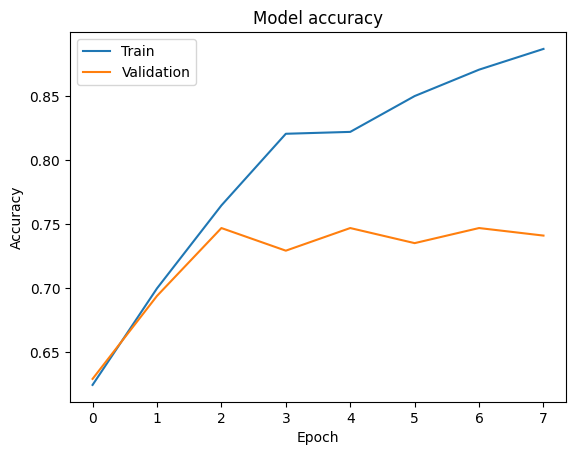

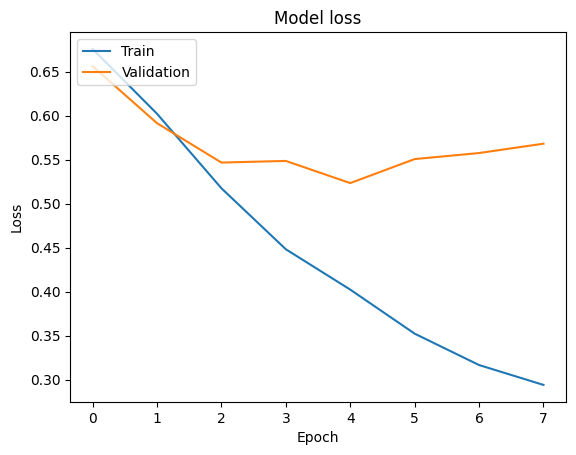

Fold 4 - Longitud de índices de entrenamiento: 680 / Longitud de índices de prueba: 170
Epoch 1/8
85/85 [==============================] - 1s 7ms/step - loss: 0.6741 - binary_accuracy: 0.5988 - precision_12: 0.7158 - recall_12: 0.1780 - val_loss: 0.6568 - val_binary_accuracy: 0.6412 - val_precision_12: 0.7419 - val_recall_12: 0.3026
Epoch 2/8
85/85 [==============================] - 0s 3ms/step - loss: 0.5973 - binary_accuracy: 0.7221 - precision_12: 0.8031 - recall_12: 0.5065 - val_loss: 0.5958 - val_binary_accuracy: 0.6471 - val_precision_12: 0.6290 - val_recall_12: 0.5132
Epoch 3/8
85/85 [==============================] - 0s 3ms/step - loss: 0.4949 - binary_accuracy: 0.7956 - precision_12: 0.8081 - recall_12: 0.7157 - val_loss: 0.5769 - val_binary_accuracy: 0.6824 - val_precision_12: 0.6341 - val_recall_12: 0.6842
Epoch 4/8
85/85 [==============================] - 0s 3ms/step - loss: 0.4130 - binary_accuracy: 0.8309 - precision_12: 0.8173 - recall_12: 0.8039 - val_loss: 0.5898 - val

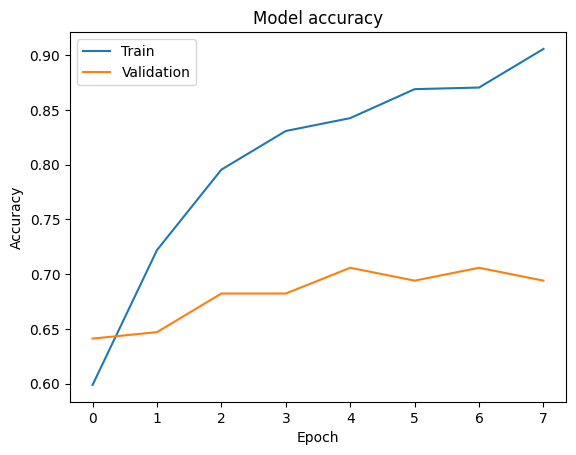

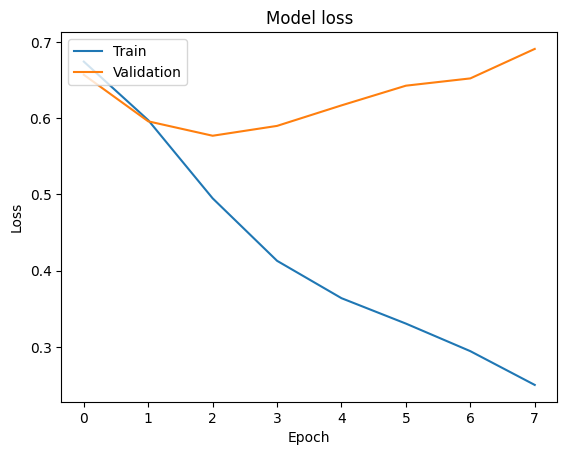

Fold 5 - Longitud de índices de entrenamiento: 680 / Longitud de índices de prueba: 170
Epoch 1/8
85/85 [==============================] - 1s 7ms/step - loss: 0.6746 - binary_accuracy: 0.6141 - precision_12: 0.5877 - recall_12: 0.4738 - val_loss: 0.6533 - val_binary_accuracy: 0.6647 - val_precision_12: 0.6863 - val_recall_12: 0.4605
Epoch 2/8
85/85 [==============================] - 0s 3ms/step - loss: 0.5856 - binary_accuracy: 0.7235 - precision_12: 0.7418 - recall_12: 0.5915 - val_loss: 0.5988 - val_binary_accuracy: 0.6824 - val_precision_12: 0.6122 - val_recall_12: 0.7895
Epoch 3/8
85/85 [==============================] - 0s 3ms/step - loss: 0.4861 - binary_accuracy: 0.7897 - precision_12: 0.7763 - recall_12: 0.7484 - val_loss: 0.5831 - val_binary_accuracy: 0.6941 - val_precision_12: 0.6176 - val_recall_12: 0.8289
Epoch 4/8
85/85 [==============================] - 0s 3ms/step - loss: 0.4344 - binary_accuracy: 0.8147 - precision_12: 0.7885 - recall_12: 0.8039 - val_loss: 0.5677 - val

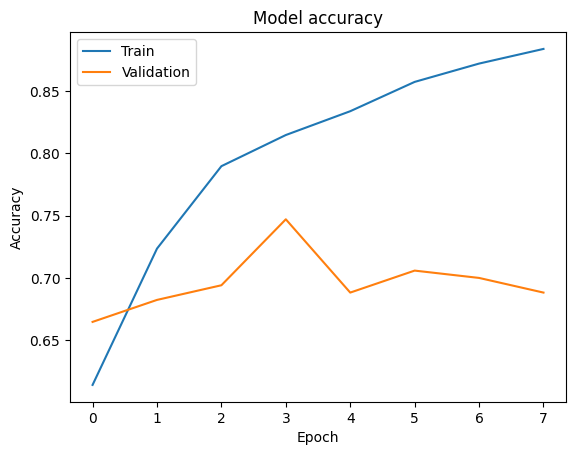

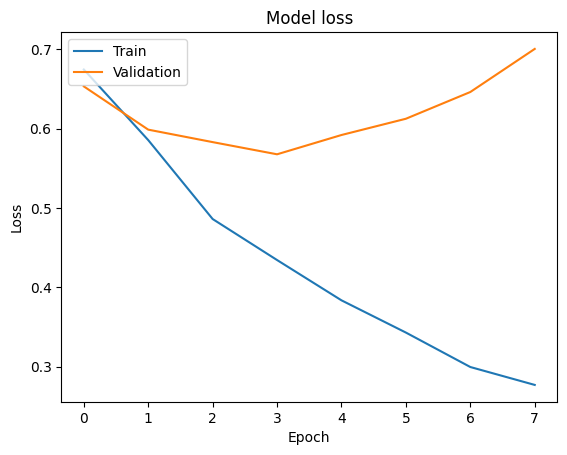

73.29% (+/- 3.60%)
71.73% (+/- 7.31%)
69.13% (+/- 4.29%)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [104]:
cross_val_nn(X_train_embeddings, y_train, (384,))

- X_train vectorizada con Embeddings (OpenAI)

In [90]:
X_train_open_ai = X_train_open_ai.to_numpy().astype('float32')

In [91]:
print(type(X_train_open_ai))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Fold 1 - Longitud de índices de entrenamiento: 680 / Longitud de índices de prueba: 170
Epoch 1/8
85/85 [==============================] - 2s 11ms/step - loss: 0.6745 - binary_accuracy: 0.5574 - precision_17: 0.5312 - recall_17: 0.1115 - val_loss: 0.6468 - val_binary_accuracy: 0.5529 - val_precision_17: 1.0000 - val_recall_17: 0.0130
Epoch 2/8
85/85 [==============================] - 0s 6ms/step - loss: 0.5978 - binary_accuracy: 0.6941 - precision_17: 0.7836 - recall_17: 0.4393 - val_loss: 0.5447 - val_binary_accuracy: 0.7706 - val_precision_17: 0.8393 - val_recall_17: 0.6104
Epoch 3/8
85/85 [==============================] - 0s 6ms/step - loss: 0.4924 - binary_accuracy: 0.7985 - precision_17: 0.8182 - recall_17: 0.7082 - val_loss: 0.5090 - val_binary_accuracy: 0.7412 - val_precision_17: 0.9024 - val_recall_17: 0.4805
Epoch 4/8
85/85 [==============================] - 0s 5ms/step - loss: 0.4237 - binary_accuracy: 0.8029 - precision_17: 0.8132 - recall_17: 0.7279 - val_loss: 0.4677 - va

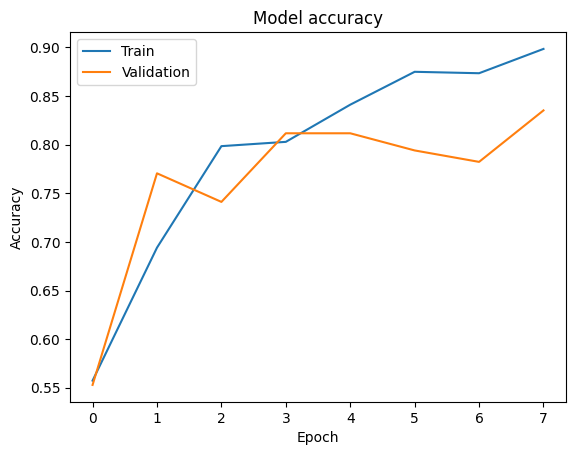

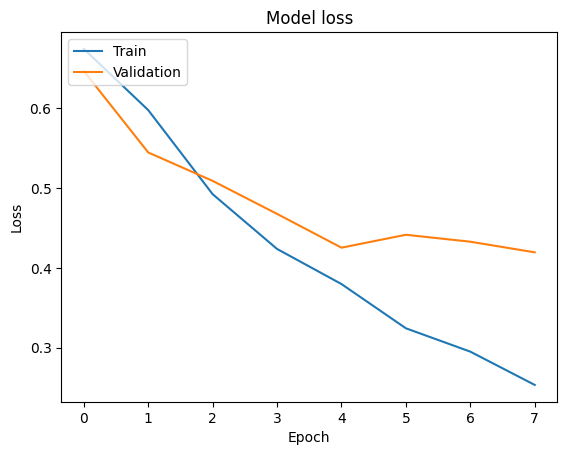

Fold 2 - Longitud de índices de entrenamiento: 680 / Longitud de índices de prueba: 170
Epoch 1/8
85/85 [==============================] - 1s 8ms/step - loss: 0.6779 - binary_accuracy: 0.6259 - precision_17: 0.7078 - recall_17: 0.2853 - val_loss: 0.6410 - val_binary_accuracy: 0.7941 - val_precision_17: 0.7143 - val_recall_17: 0.9091
Epoch 2/8
85/85 [==============================] - 0s 4ms/step - loss: 0.6070 - binary_accuracy: 0.7324 - precision_17: 0.7639 - recall_17: 0.5836 - val_loss: 0.5251 - val_binary_accuracy: 0.7529 - val_precision_17: 0.8889 - val_recall_17: 0.5195
Epoch 3/8
85/85 [==============================] - 0s 5ms/step - loss: 0.5018 - binary_accuracy: 0.7868 - precision_17: 0.7878 - recall_17: 0.7180 - val_loss: 0.4388 - val_binary_accuracy: 0.7647 - val_precision_17: 0.8033 - val_recall_17: 0.6364
Epoch 4/8
85/85 [==============================] - 0s 4ms/step - loss: 0.4318 - binary_accuracy: 0.8206 - precision_17: 0.8040 - recall_17: 0.7934 - val_loss: 0.4296 - val

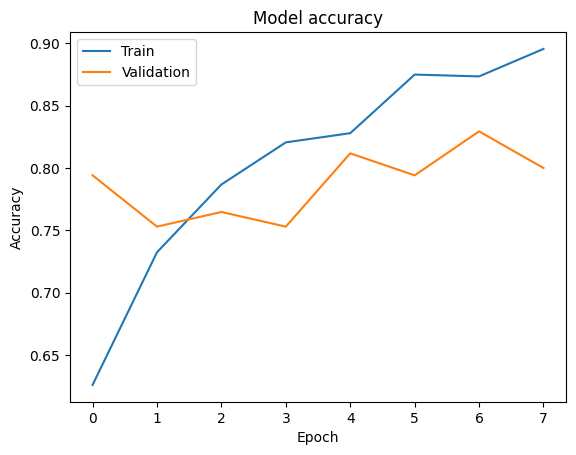

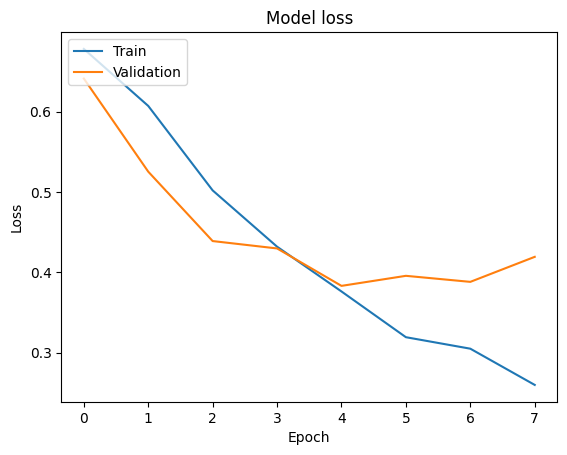

Fold 3 - Longitud de índices de entrenamiento: 680 / Longitud de índices de prueba: 170
Epoch 1/8
85/85 [==============================] - 1s 7ms/step - loss: 0.6799 - binary_accuracy: 0.6200 - precision_17: 0.6974 - recall_17: 0.2768 - val_loss: 0.6539 - val_binary_accuracy: 0.7412 - val_precision_17: 0.9211 - val_recall_17: 0.4605
Epoch 2/8
85/85 [==============================] - 0s 4ms/step - loss: 0.5957 - binary_accuracy: 0.7221 - precision_17: 0.7427 - recall_17: 0.5850 - val_loss: 0.5641 - val_binary_accuracy: 0.7529 - val_precision_17: 0.7125 - val_recall_17: 0.7500
Epoch 3/8
85/85 [==============================] - 0s 5ms/step - loss: 0.4938 - binary_accuracy: 0.8015 - precision_17: 0.8021 - recall_17: 0.7418 - val_loss: 0.4928 - val_binary_accuracy: 0.7941 - val_precision_17: 0.8868 - val_recall_17: 0.6184
Epoch 4/8
85/85 [==============================] - 0s 4ms/step - loss: 0.4154 - binary_accuracy: 0.8132 - precision_17: 0.8185 - recall_17: 0.7516 - val_loss: 0.4677 - val

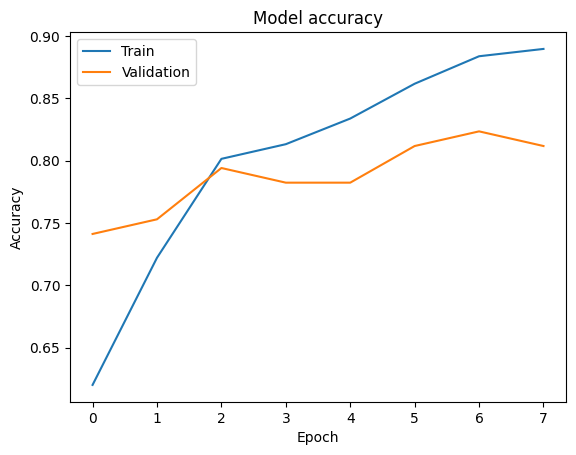

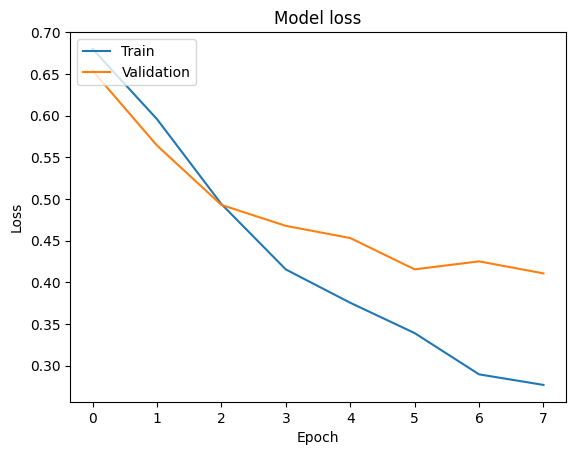

Fold 4 - Longitud de índices de entrenamiento: 680 / Longitud de índices de prueba: 170
Epoch 1/8
85/85 [==============================] - 2s 10ms/step - loss: 0.6745 - binary_accuracy: 0.6482 - precision_17: 0.7150 - recall_17: 0.3613 - val_loss: 0.6487 - val_binary_accuracy: 0.7000 - val_precision_17: 0.6761 - val_recall_17: 0.6316
Epoch 2/8
85/85 [==============================] - 1s 6ms/step - loss: 0.5775 - binary_accuracy: 0.7235 - precision_17: 0.7521 - recall_17: 0.5752 - val_loss: 0.5541 - val_binary_accuracy: 0.7235 - val_precision_17: 0.6986 - val_recall_17: 0.6711
Epoch 3/8
85/85 [==============================] - 1s 6ms/step - loss: 0.4644 - binary_accuracy: 0.7882 - precision_17: 0.7893 - recall_17: 0.7222 - val_loss: 0.5014 - val_binary_accuracy: 0.7412 - val_precision_17: 0.7286 - val_recall_17: 0.6711
Epoch 4/8
85/85 [==============================] - 0s 5ms/step - loss: 0.3973 - binary_accuracy: 0.8206 - precision_17: 0.8129 - recall_17: 0.7810 - val_loss: 0.5379 - va

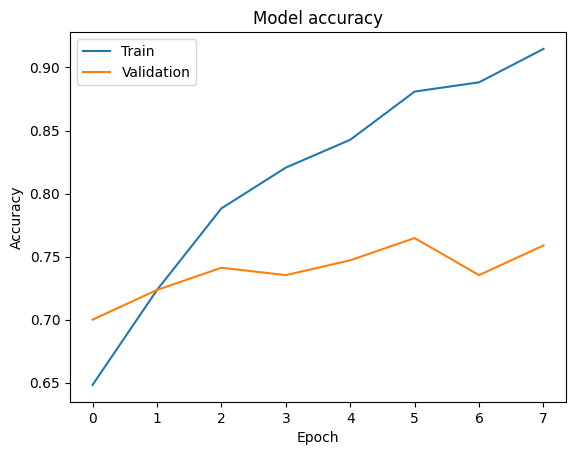

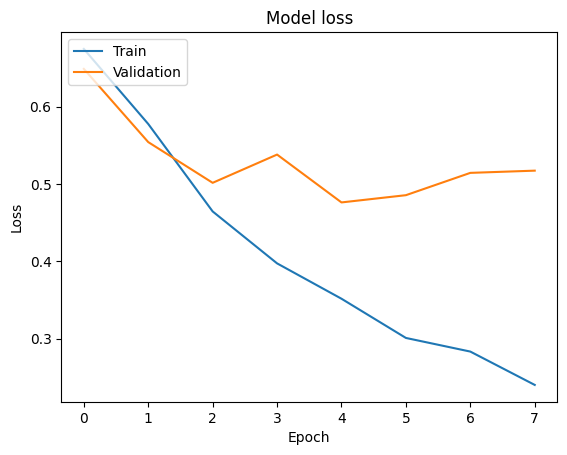

Fold 5 - Longitud de índices de entrenamiento: 680 / Longitud de índices de prueba: 170
Epoch 1/8
85/85 [==============================] - 1s 7ms/step - loss: 0.6795 - binary_accuracy: 0.6000 - precision_17: 0.7100 - recall_17: 0.1859 - val_loss: 0.6497 - val_binary_accuracy: 0.6118 - val_precision_17: 1.0000 - val_recall_17: 0.1316
Epoch 2/8
85/85 [==============================] - 0s 4ms/step - loss: 0.6040 - binary_accuracy: 0.7000 - precision_17: 0.8000 - recall_17: 0.4444 - val_loss: 0.5486 - val_binary_accuracy: 0.7765 - val_precision_17: 0.8654 - val_recall_17: 0.5921
Epoch 3/8
85/85 [==============================] - 0s 4ms/step - loss: 0.5055 - binary_accuracy: 0.7897 - precision_17: 0.8075 - recall_17: 0.6993 - val_loss: 0.4828 - val_binary_accuracy: 0.7588 - val_precision_17: 0.7108 - val_recall_17: 0.7763
Epoch 4/8
85/85 [==============================] - 0s 4ms/step - loss: 0.4182 - binary_accuracy: 0.8265 - precision_17: 0.8264 - recall_17: 0.7778 - val_loss: 0.4380 - val

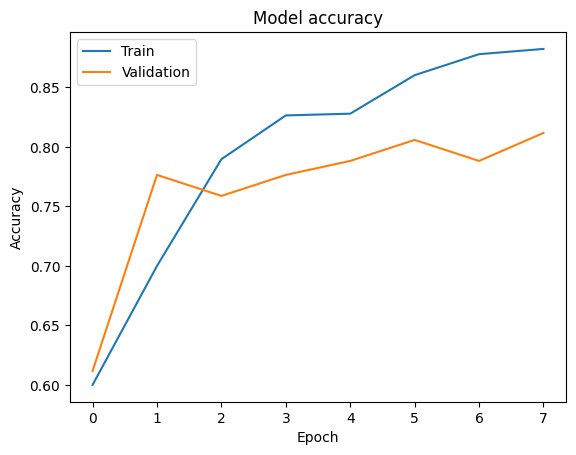

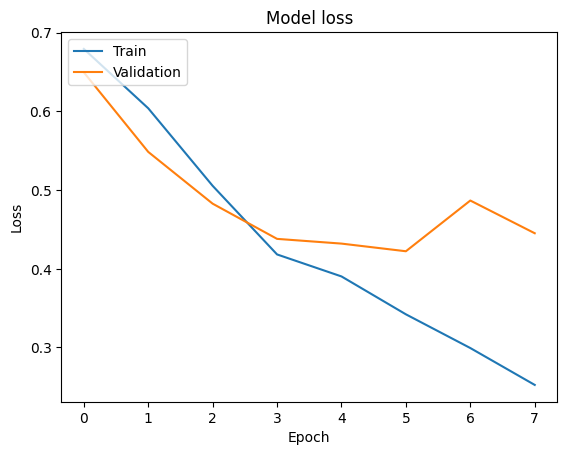

80.35% (+/- 2.51%)
80.98% (+/- 2.86%)
73.55% (+/- 4.21%)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [115]:
cross_val_nn(X_train_open_ai, y_train, (1536,))

### Resultados con Embeddings OpenAI y Redes Neuronales

- Accuracy = 80.47% (+/- 2.59%)
- Precision = 80.41% (+/- 6.28%)
- Recall = 76.39% (+/- 11.08%)

### Evaluación Test csv

In [195]:
def transform_X(X):
  X_transformed = X.apply(lambda x: contractions.fix(x)).apply(preprocess_text).to_frame()
  X_transformed['ada_embedding'] = X_transformed['Text'].apply(lambda x: get_embedding(x))
  X_transformed = pd.DataFrame(list(X_transformed['ada_embedding']))
  return X_transformed

In [196]:
def transform_predict_test_data():
    '''
    This function transforms the test.csv file and predicts
    the response (y_test_predicted). It calls the evaluation
    function to obtain performance metrics.
    '''
    path_to_open = 'data_for_testing.csv'
    df_test = pd.read_csv(path_to_open)

    #drop the column Unnamed: 0 that was created automatically
    #when saving the file the first time.
    df_test = df_test.drop(columns=['Unnamed: 0'])
    X_test = df_test['Text']
    y_test = df_test['IsToxic']
    y_test = y_test.replace({True: 1, False: 0})
    y_test = y_test.values.astype('int32')

    X_test_transformed = transform_X(X_test)

    model = load_model('neural_network.h5')

    y_test_predicted = model.predict(X_test_transformed)
    y_test_predicted = y_test_predicted.astype('int32')

    test_evaluation(y_test, y_test_predicted)

In [197]:
def test_evaluation(y_test_true, y_test_predicted):
    '''
    This function takes the y that is true and the y predicted by
    the model and calculates the different metrics.
    '''
    acc = accuracy_score(y_test_true, y_test_predicted)
    conf_matrix = confusion_matrix(y_test_true, y_test_predicted)
    precision = precision_score(y_test_true, y_test_predicted)
    recall = recall_score(y_test_true, y_test_predicted)
    f1 = f1_score(y_test_true, y_test_predicted)

    print('')
    print(f"Accuracy: {acc:.3f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")

In [ ]:
transform_predict_test_data()